In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Smart Knower/Major Project/data.csv')
df

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy
...,...,...,...,...
10012,10016,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...",irritating,angry
10013,10017,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...",irritating,angry
10014,10018,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",irritating,angry
10015,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...",irritating,angry


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10017 entries, 0 to 10016
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sl no       10017 non-null  int64 
 1   Tweets      10017 non-null  object
 2   Search key  10017 non-null  object
 3   Feeling     10017 non-null  object
dtypes: int64(1), object(3)
memory usage: 313.2+ KB


In [5]:
new_df = df.to_csv('newdatafile.csv',index=False)
new_df

In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Smart Knower/Major Project/newdatafile.csv')
df

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy
...,...,...,...,...
10012,10016,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...",irritating,angry
10013,10017,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...",irritating,angry
10014,10018,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",irritating,angry
10015,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...",irritating,angry


In [8]:
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


177

In [9]:
# Remove HTML Tag
from bs4 import BeautifulSoup
def html_tag(text):
  soup = BeautifulSoup(text,"html.parser")
  new_text = soup.get_text()
  return new_text

html_tag("<html><h2> Some important info </h2></html>")

' Some important info '

In [10]:
# Expand Contractions
!pip install contractions 

     |████████████████████████████████| 286kB 5.0MB/s 
     |████████████████████████████████| 327kB 26.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85404 sha256=9575313f2712f3f68d3db49a8381f3e35ba7e2ce4b64f82b0e87b2dda1fc4863
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [11]:
import contractions
def con(text):
  expand = contractions.fix(text)
  return expand

con("U all can't expand I'd think")

'you all cannot expand I would think'

In [12]:
# Removal of Special Characters
import re
def remove_sp(text):
  pattern = r'[^A-Za-z0-9]'
  text = re.sub(pattern,' ',text)
  return text

remove_sp("Well this was fun! What do you think? 123#")


'Well this was fun  What do you think  123 '

In [13]:
# Removal of Numbers
def remove_num(text):
  result = re.sub(r'\d +',' ',text)
  return result

remove_num("There are 3 balls in this bag, and 12 in the other one.")

'There are  balls in this bag, and 1 in the other one.'

In [14]:
import inflect
p = inflect.engine()
  
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
  
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
  
        # append the word as it is
        else:
            new_string.append(word)
  
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str
  
convert_number('There are 3 balls in this bag, and 12 in the other one.')

'There are three balls in this bag, and twelve in the other one.'

In [15]:
# Tokenization
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [16]:
# Removal of Stop Words
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list]
  filtered_text = '  '.join(filtered_tokens)
  return filtered_text

In [17]:
# 1.Lowercase
# 2.HTML Tags
# 3.Contractions
# 4.Special Characters
# 5.Stop Words

In [18]:
df.Tweets = df.Tweets.apply(lambda x:x.lower())

df.Tweets = df.Tweets.apply(html_tag)

df.Tweets = df.Tweets.apply(con)

df.Tweets = df.Tweets.apply(remove_sp)

df.Tweets = df.Tweets.apply(remove_stopwords)

df.Tweets = df.Tweets.apply(remove_num)

df.Tweets = df.Tweets.apply(convert_number)


df.tail()

,Sl no,Tweets,Search key,Feeling
10012,10016,tweet eight matteo tweeted gamespot frannkches...,irritating,angry
10013,10017,tweet eight tweeted bratgiirl irritating wish ...,irritating,angry
10014,10018,tweet eight chowkidar ricky sharma tweeted mam...,irritating,angry
10015,10019,tweet eight katoe exe tweeted know hate indie ...,irritating,angry
10016,10019,tweet eight katoe exe tweeted know hate indie ...,irritating,angry


Percantage for default

happy      43.20
sad        28.44
angry      13.39
fear        8.62
disgust     6.36
Name: Feeling, dtype: float64


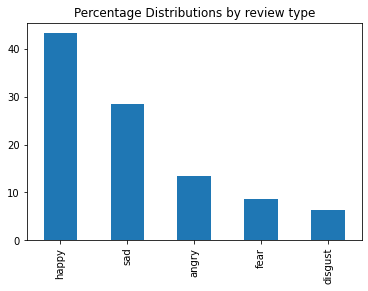

In [19]:
# checking for the description of default 
import matplotlib.pyplot as plt
%matplotlib inline
print("Percantage for default\n")
print(round(df.Feeling.value_counts(normalize=True)*100,2))
round(df.Feeling.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [20]:
df.drop(columns = ['Search key'],inplace = True)
df

,Sl no,Tweets,Feeling
0,1,fe ed rt mirayadizon time ticking fast relive ...,happy
1,2,ed rt ninjaryugo https co wn24wlfrml,happy
2,3,ris ed happy birthday one smokin hot mama love...,happy
3,4,jwinnie best cheer jwinnie ed omg left min fiv...,happy
4,5,madhurima wth vc ed good morning dear vikramch...,happy
...,...,...,...
10012,10016,tweet eight matteo tweeted gamespot frannkches...,angry
10013,10017,tweet eight tweeted bratgiirl irritating wish ...,angry
10014,10018,tweet eight chowkidar ricky sharma tweeted mam...,angry
10015,10019,tweet eight katoe exe tweeted know hate indie ...,angry


In [21]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.1MB/s 


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()
df['compound'] = df['Feeling'].apply(lambda x: vs.polarity_scores(x)['compound'])

In [23]:
df

,Sl no,Tweets,Feeling,compound
0,1,fe ed rt mirayadizon time ticking fast relive ...,happy,0.5719
1,2,ed rt ninjaryugo https co wn24wlfrml,happy,0.5719
2,3,ris ed happy birthday one smokin hot mama love...,happy,0.5719
3,4,jwinnie best cheer jwinnie ed omg left min fiv...,happy,0.5719
4,5,madhurima wth vc ed good morning dear vikramch...,happy,0.5719
...,...,...,...,...
10012,10016,tweet eight matteo tweeted gamespot frannkches...,angry,-0.5106
10013,10017,tweet eight tweeted bratgiirl irritating wish ...,angry,-0.5106
10014,10018,tweet eight chowkidar ricky sharma tweeted mam...,angry,-0.5106
10015,10019,tweet eight katoe exe tweeted know hate indie ...,angry,-0.5106


In [24]:
# input and output
x = df['Tweets'].values
y = df['Feeling'].values

In [25]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [26]:
print(x_train.shape)
print(x_test.shape)

(7512,)
(2505,)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)   # only tranform for test data and fit_transform for train data

# document term matrix

In [30]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_vect,y_train)

# value error : could not convert string to float

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = model.predict(x_test_vect)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8794411177644711

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       angry       0.78      0.99      0.87       277
     disgust       0.68      0.99      0.81       106
        fear       0.71      0.97      0.82       150
       happy       0.99      0.79      0.88      1312
         sad       0.86      0.97      0.91       660

    accuracy                           0.88      2505
   macro avg       0.80      0.94      0.86      2505
weighted avg       0.90      0.88      0.88      2505



In [34]:
test = vect.transform([df['Tweets'][0]])
model.predict(test)

array(['happy'], dtype=object)

In [35]:
# Pipe line - Combining two or more estimators 
# Joblib - Saving the model
# Streamlit - Webapp
# Heroku - Cloud service to diploy webapp

In [36]:
# Pipe Line = CountVectorizer+SVM


from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)

y_pred = text_model.predict(x_test)
y_pred




array(['sad', 'happy', 'happy', ..., 'happy', 'happy', 'happy'],
      dtype=object)

In [37]:
text_model

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [44]:
import joblib
joblib.dump(text_model,'Twitter_Reviews')

# Saving pipeline in a file

['Twitter_Reviews']